# Includes usage of cross_validation, grid_searchCV, tree_plot and all the required applications of packages that includes in sklearn

In [1]:
import numpy as np
import pandas as pd

from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset

import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

####################################################
# Also collect the new imports needed for this lab #
####################################################


from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score, log_loss)

from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import GradientBoostingRegressor as GBR

from ISLP.bart import BART


import ISLP

Fitting Classification Trees

In [2]:
#We first use classificatio ntrees to analyze the Carseats data set. In these data, Sales is a continuous variable, and so we begin by recoding it as a binary variable. We use the where() funciton to create a variable, called High, which takes on a value fo Yes if the Sales varibale exceeds 8, and takes on a value of No otherwise.

carseats = load_data('Carseats')
high = np.where(carseats.Sales > 8,"yes","No")

In [3]:
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
high

array(['yes', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'No', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No',
       'yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'No', 'yes', 'No', 'No', 'yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'yes', 'No', 'No', 'No', 'yes',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'yes',
       'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'yes',
       'No', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No',
       'No', 'No', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'yes', 'No', 'yes', 'yes',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes',
       'No', 'yes', 'No', 'No', 'No', 'No', 'No', 'yes', 'yes', 'N

In [5]:
model = MS(carseats.drop('Sales',axis=1), intercept=False)

In [6]:
D = model.fit_transform(carseats)
feature_names = list(D.columns)
X = np.asarray(D)   # This and the following are 
X = D.__array__()

In [7]:
# Ther are several options needed to specify the classifier, such as max_depth, min_samples_split and criterion.
# We also set random_state for reproducibility: ties in the split criterion are broken at random


clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)
clf.fit(X, high)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [8]:
accuracy_score(high, clf.predict(X))

0.79

[Text(0.5, 0.875, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 400\nvalue = [236, 164]'),
 Text(0.25, 0.625, 'Price <= 92.5\nentropy = 0.894\nsamples = 315\nvalue = [217, 98]'),
 Text(0.125, 0.375, 'Income <= 57.0\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]'),
 Text(0.0625, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.375, 0.375, 'Advertising <= 13.5\nentropy = 0.804\nsamples = 269\nvalue = [203, 66]'),
 Text(0.3125, 0.125, 'entropy = 0.687\nsamples = 224\nvalue = [183, 41]'),
 Text(0.4375, 0.125, 'entropy = 0.991\nsamples = 45\nvalue = [20, 25]'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.767\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.375, 'US[Yes] <= 0.5\nentropy = 0.523\nsamples = 68\nvalue = [8, 60]'),
 Text(0.5625, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'entropy = 0.239\nsamples = 51\nvalue = [2, 49]'),
 Text(0.875, 0.375, 'In

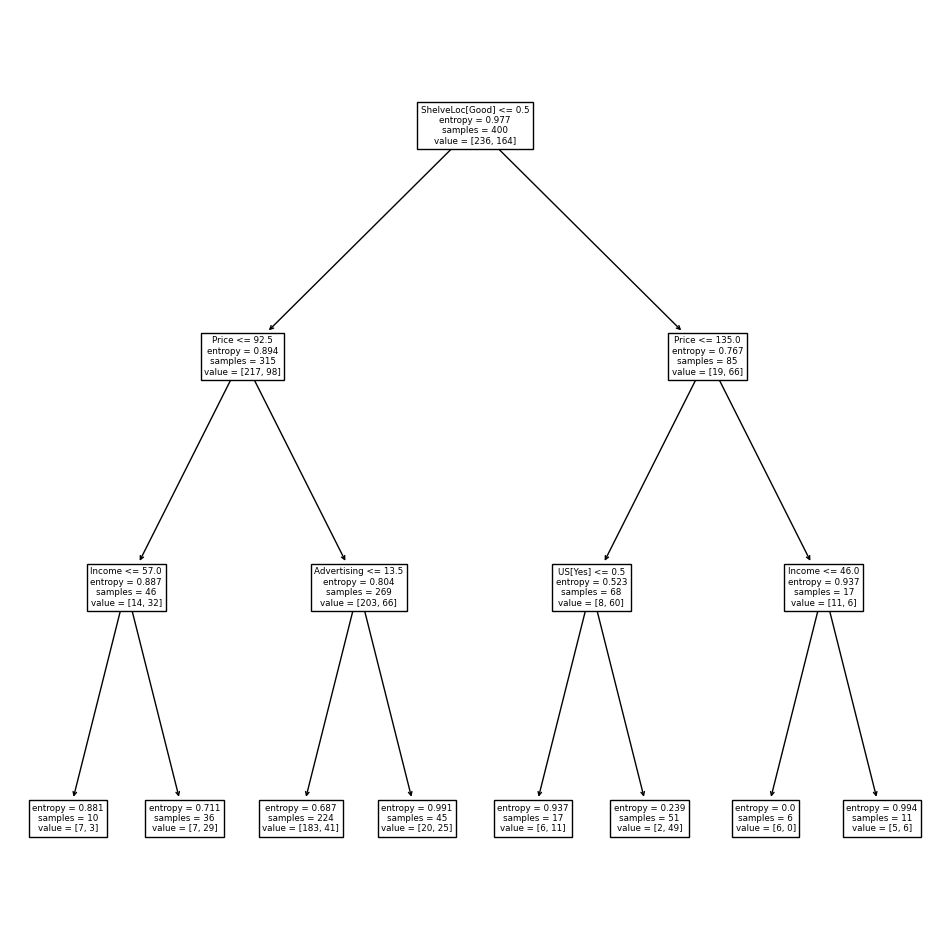

In [9]:
#For classification trees, we can access the value of the deviance using log_loss().

resid_dev = np.sum(log_loss(high, clf.predict_proba(X)))
resid_dev  # As small deciance indicates a tree that provides a good fit to the training data.

# One of the most attractive properties of trees is that they can be graphically displayed. Here we us the plot() function to display
# the tree structure

ax = subplots(figsize=(12,12))[1]
plot_tree(clf, feature_names=feature_names, ax=ax)


In [10]:
#using export text

print(export_text(clf, feature_names=feature_names, show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: yes



In [11]:
# In order to properly evaluate the performance of a classification tree on these data,
# must estimate the test error rather than simply computing the training error. We split the observations into a training
# set, and evaluate its performance on the test data. This pattern is similar to that, with the
# linear modles replaced here by decision trees -- the code for validation is almost identical. This approach leads to
# correct predictions for almost 68.5% of the locations inthe test data set.

In [12]:
skm.cross_validate?

Signature:
skm.cross_validate(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    return_train_score=False,
    return_estimator=False,
    return_indices=False,
    error_score=nan,
)
Docstring:
Evaluate metric(s) by cross-validation and also record fit/score times.

Read more in the :ref:`User Guide <multimetric_cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test 

In [13]:
validation = skm.ShuffleSplit(n_splits=1, test_size=200, random_state=0)

results = skm.cross_validate(clf, D, high, cv=validation)
results['test_score']

array([0.685])

In [14]:
#To improve the performance we might consider whether pruning the tree might lead to improved
# classification performance. We first split the datta inot a training and test set. We wil use cross-validation to prune the tre on the 
# training set, and then evaludate the performance  of the  prunded tree on the test set.


(X_train, X_test, High_train, High_test) = skm.train_test_split(X, high, train_size=0.5, random_state=22)

In [15]:
X_test.shape, X_train.shape

((200, 11), (200, 11))

## After using Regression, we will now use classification

In [16]:
from pprint import pprint
pprint(DTC.__doc__)

('A decision tree classifier.\n'
 '\n'
 '    Read more in the :ref:`User Guide <tree>`.\n'
 '\n'
 '    Parameters\n'
 '    ----------\n'
 '    criterion : {"gini", "entropy", "log_loss"}, default="gini"\n'
 '        The function to measure the quality of a split. Supported criteria '
 'are\n'
 '        "gini" for the Gini impurity and "log_loss" and "entropy" both for '
 'the\n'
 '        Shannon information gain, see :ref:`tree_mathematical_formulation`.\n'
 '\n'
 '    splitter : {"best", "random"}, default="best"\n'
 '        The strategy used to choose the split at each node. Supported\n'
 '        strategies are "best" to choose the best split and "random" to '
 'choose\n'
 '        the best random split.\n'
 '\n'
 '    max_depth : int, default=None\n'
 '        The maximum depth of the tree. If None, then nodes are expanded '
 'until\n'
 '        all leaves are pure or until all leaves contain less than\n'
 '        min_samples_split samples.\n'
 '\n'
 '    min_samples_split : int

In [17]:
def acc_score(criterion={"gini", "entropy", "log_loss"}):
    for i in criterion:
        clf = DTC(criterion=i, random_state=22)
        clf.fit(X_train, High_train)
        print(f"Accuracy score for {i}",accuracy_score(High_test, clf.predict(X_test)))
acc_score()

Accuracy score for log_loss 0.755
Accuracy score for entropy 0.755
Accuracy score for gini 0.685


In [18]:
clf.cost_complexity_pruning_path?

Signature: clf.cost_complexity_pruning_path(X, y, sample_weight=None)
Docstring:
Compute the pruning path during Minimal Cost-Complexity Pruning.

See :ref:`minimal_cost_complexity_pruning` for details on the pruning
process.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The training input samples. Internally, it will be converted to
    ``dtype=np.float32`` and if a sparse matrix is provided
    to a sparse ``csc_matrix``.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    The target values (class labels) as integers or strings.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights. If None, then samples are equally weighted. Splits
    that would create child nodes with net zero or negative weight are
    ignored while searching for a split in each node. Splits are also
    ignored if they would result in any single class carrying a
    negative weight in either child node.

Returns
-------
cc

In [19]:
#Further we use the cost_complexity_pruning_path() method of clf to extract cost-complexity values


ccp_path = clf.cost_complexity_pruning_path(X_train, High_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

In [20]:
skm.GridSearchCV?

Init signature:
skm.GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or lis

In [21]:
# This yields a set of impurities and α values from which we can extract an optimal one by cross-validation


grid = skm.GridSearchCV(clf, {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')

grid.fit(X_train, High_train)
grid.best_score_



0.77

[Text(0.5, 0.875, 'Advertising <= 9.5\nentropy = 0.958\nsamples = 200\nvalue = [124, 76]'),
 Text(0.25, 0.625, 'Price <= 108.5\nentropy = 0.774\nsamples = 123\nvalue = [95, 28]'),
 Text(0.125, 0.375, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 51\nvalue = [30, 21]'),
 Text(0.0625, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [30, 14]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.375, 'CompPrice <= 124.5\nentropy = 0.46\nsamples = 72\nvalue = [65, 7]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.65\nsamples = 42\nvalue = [35, 7]'),
 Text(0.75, 0.625, 'Price <= 124.0\nentropy = 0.956\nsamples = 77\nvalue = [29, 48]'),
 Text(0.625, 0.375, 'CompPrice <= 123.5\nentropy = 0.624\nsamples = 45\nvalue = [7, 38]'),
 Text(0.5625, 0.125, 'entropy = 0.887\nsamples = 23\nvalue = [7, 16]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.875, 0.375, 'Advertising

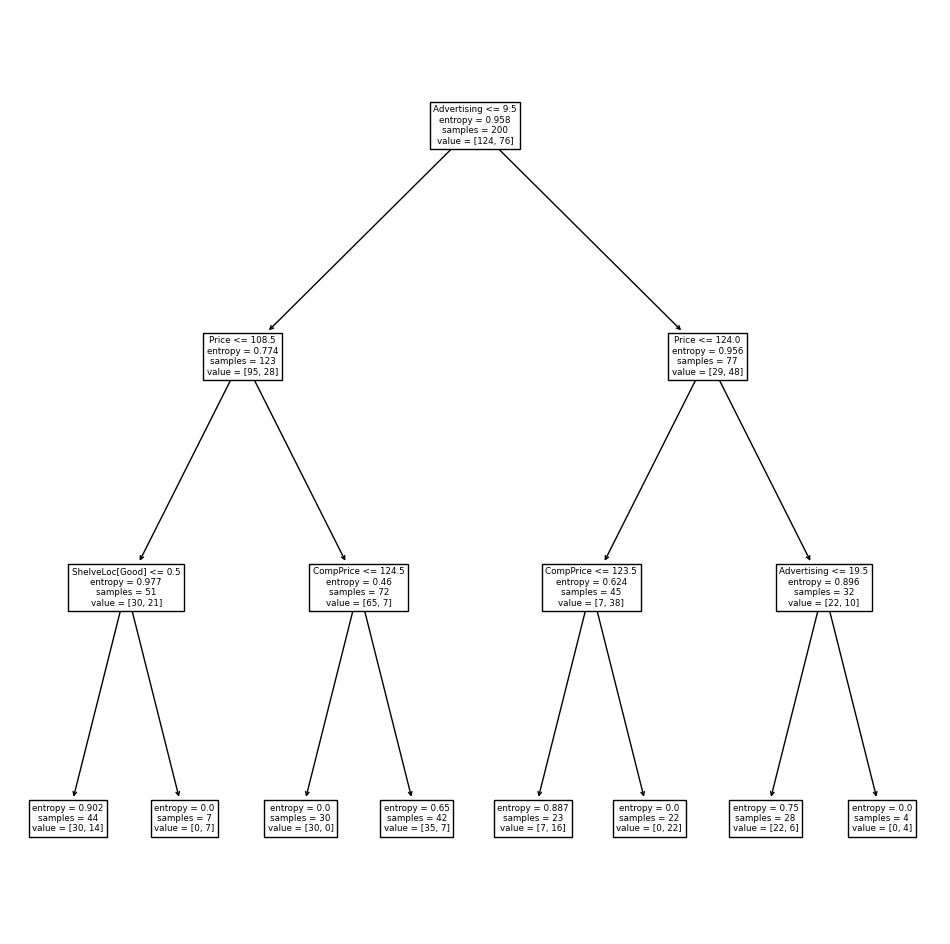

In [22]:
# Lets take a look at the pruned tree
ax = subplots(figsize=(12,12))[1]
best_ = grid.best_estimator_
plot_tree(best_, feature_names=feature_names, ax=ax)



In [23]:
#We could count the leaves, or query best_

best_.tree_.n_leaves

8

In [24]:
print(accuracy_score(High_test, best_.predict(X_test)))
confusion = confusion_table(best_.predict(X_test), High_test)
confusion

0.66


Truth,No,yes
Predicted,,
No,91,47
yes,21,41


## Fitting Regression Trees

In [25]:
# Here we fit a regression tree to the Boston datas set. The steps are similar to those for classification trees.


boston =  load_data('Boston')
model = MS(boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(boston)
feature_names = list(D.columns)
X = D.__array__()

In [26]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 2.9600e+02, 1.5300e+01,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        7.8800e+00]])

In [27]:
D

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [28]:
#First, we split the data into training and test sets, and fit the tree to the training data. Here we
#use 30% of the data for the test set

In [29]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, boston['medv'], test_size=0.3, random_state=0)

[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text(0.6875, 0.125, 'squared_error = 6.997\nsamples = 4\nvalue = 

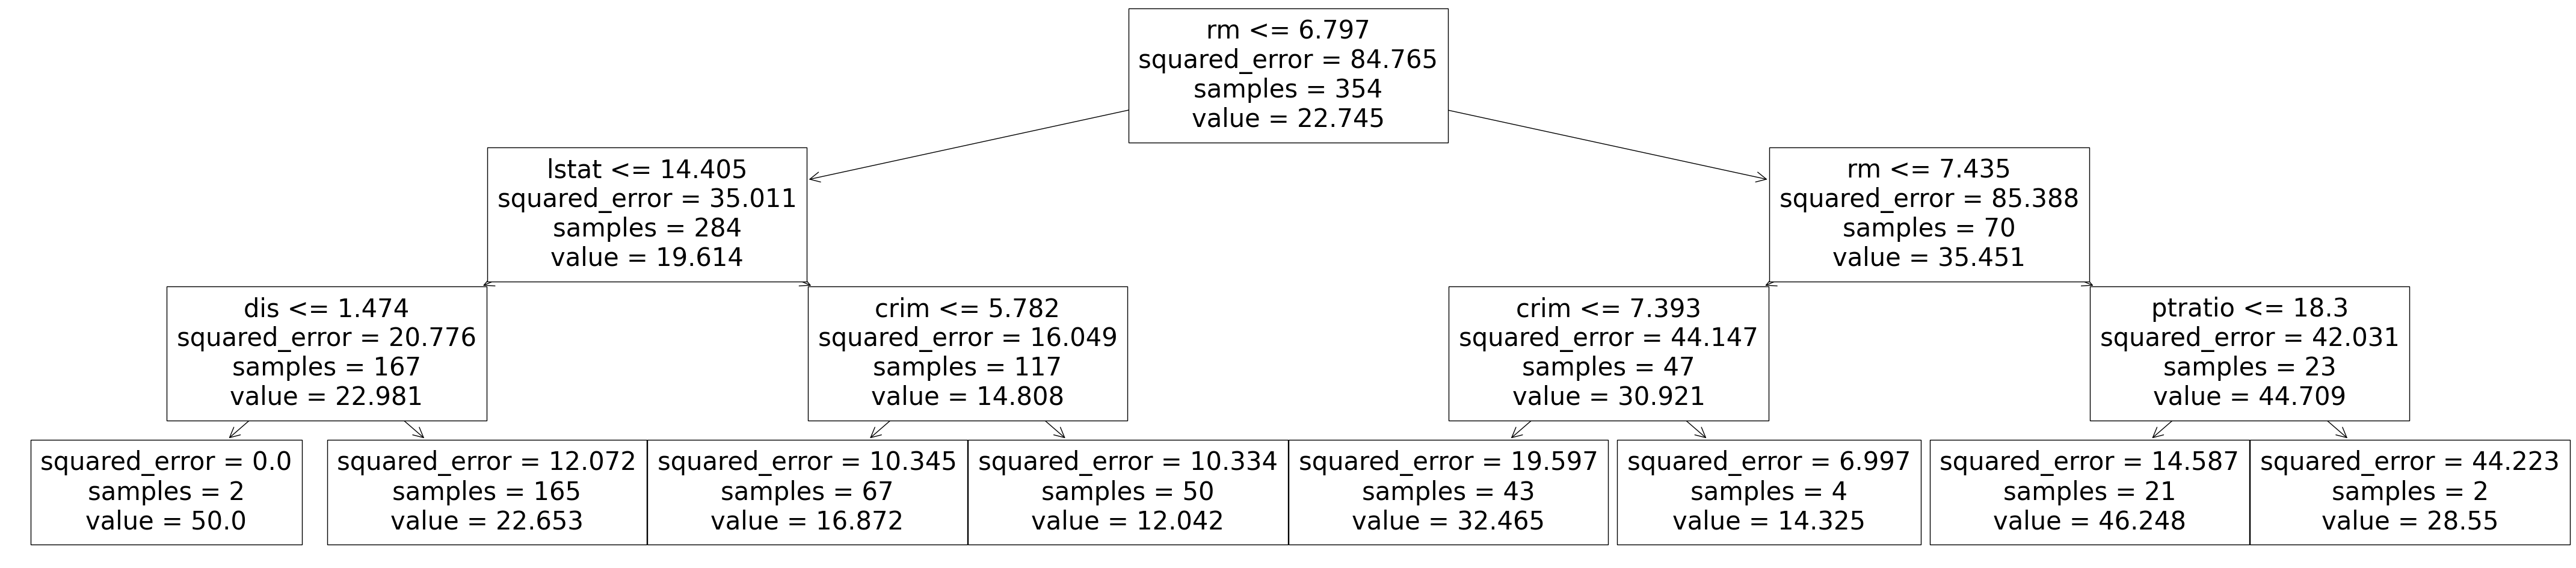

In [30]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)

ax = subplots(figsize=(55,12))[1]
plot_tree(reg, feature_names=feature_names, ax=ax)

In [31]:
# The variable lstat measures the percentage of individuals with lower socioeconomic status.
# The tree indicatest that lower values of lstat correspond to more expensive houses. The tree predicts a median house
# price for small sized homes. in suburbs in which residents have low socioeconomic status and the crime-rate is moderate

ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)

grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

G = grid.fit(X_train, y_train)

In [32]:
#In keeping with the cross-validation results, we use the pruned tree to make predictions on the test set

best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

28.069857549754044

[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text(0.6875, 0.125, 'squared_error = 6.997\nsamples = 4\nvalue = 

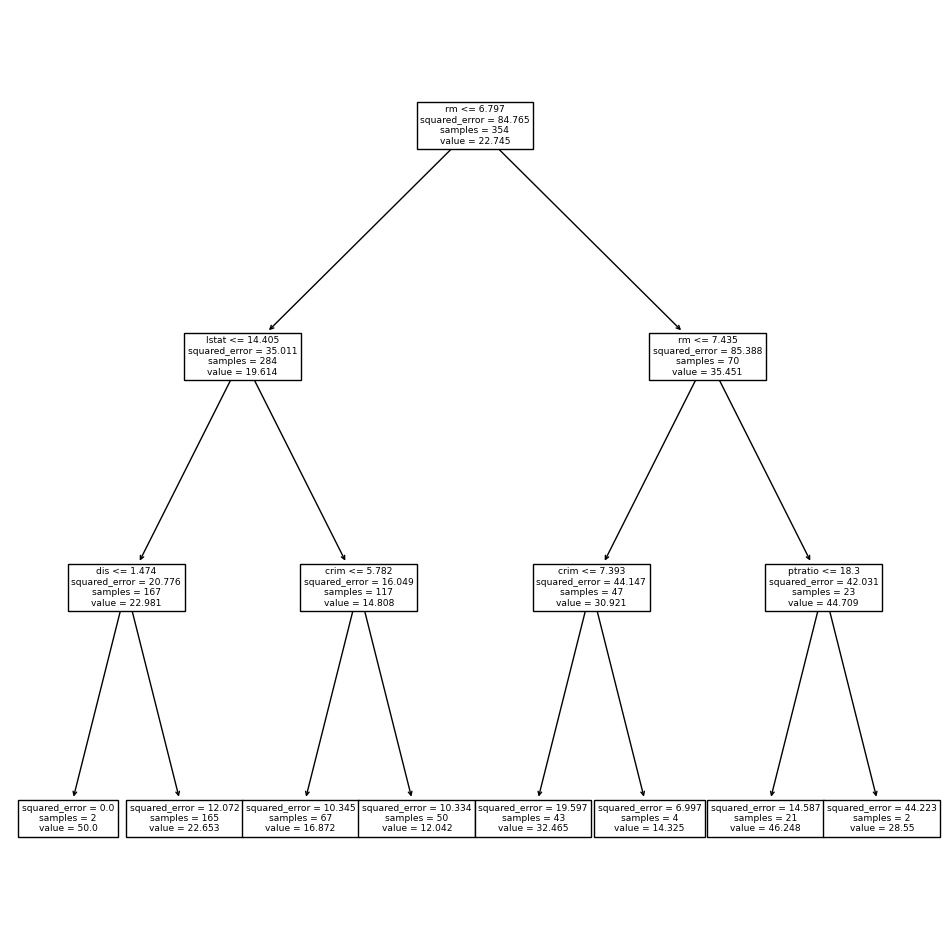

In [33]:
ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
          feature_names=feature_names,
          ax=ax)

## Bagging and Random Forests

In [34]:
# Here we apply bagging and random forests to the Boston data, using the
# RandomForestRegressor() form the sklearn.ensemble package. Recall that bagging is simply a special case
# of a random forest with m = p. Therefore the RandomForestRegressor() funciton can be used to perform both 
# bagging and random forests. We start with bagging.

bag_boston = RF(max_features=X_train.shape[1], random_state=22)
bag_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=12, random_state=22)

In [35]:
# The argumetn max_features indicates that all 12 predictors should be 
# considered for each split of the tree - in other words, that bagging should be done
# How does this bagged model perform on the test set?

14.886061065789482

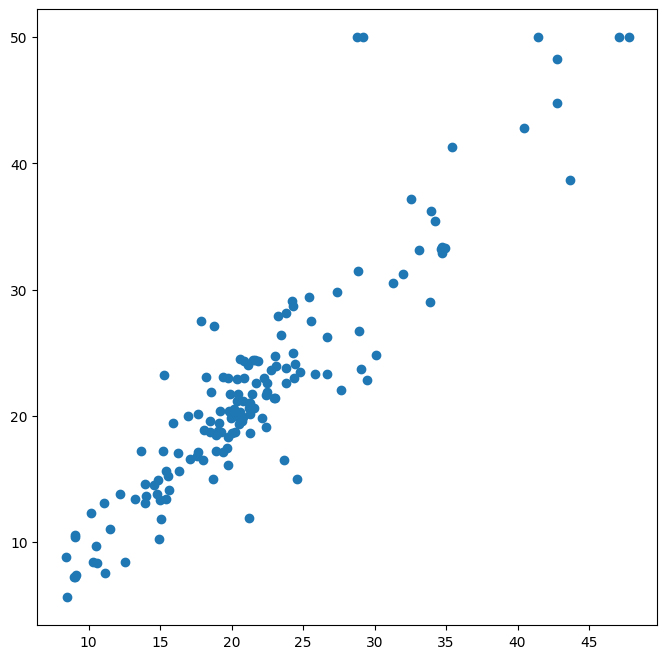

In [36]:
ax =  subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test - y_hat_bag)**2)

In [37]:
# The test set MSE associated with bagged regression tree is 14.63,
# about half that obtained using an optionally-pruned single tree. We could change the number
# of trees grown from the default of 100 by using the n_estimators argument


bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=500,
                random_state=0).fit(X_train, y_train)

y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)




14.605662565263161

In [38]:
# There is not much change. Bagging and random forests cannot overfit by increasing
# the number of trees, but can underfit if the number is too small.
# Growing a random forest proceeds in exactly the same way.
# Except that we use a smaller value for the max_features argument

# By default RandomForestRegressor() uses p variables when building a random forest of regression
# trees and RandomForestClassifier() uses sqrt(p) variabels when building a randomk forest of classification trees.

# Here we use max_features = 6.

RF_boston = RF(max_features=6,
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)

20.04276446710527

### We can see that the random forest did some worse than the bagging

In [39]:
# Lets check the features_imp then

feature_imp = pd.DataFrame(
    {'importance': RF_boston.feature_importances_},
    index=feature_names)


In [40]:
feature_imp.sort_values(by='importance', ascending=False)

,importance
lstat,0.356203
rm,0.332163
ptratio,0.067270
crim,0.055404
indus,0.053851
dis,0.041582
nox,0.035225
tax,0.025355
age,0.021506
rad,0.004784


### Boosting

In [41]:
# Here we use GradientBoostingRegressor() from sklearn.ensemble to fit boosted
# regression trees tot the Boston data set. For classification we would use GradientBoostingClassifier()
# The argument n_estimators=5000 indicates that we wnat 5000 trees, and the option max_depth=3 limits
# The depth of each tree. The argument learning_rate is the 'lambda' mentioned earlier in the description
# of boosting


boost_boston = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)

boost_boston.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

In [42]:
# We can see how the training  error decreases with the train_score_ attribute.
# To get an idea of how the test error decreases we can use the staged_predict() method to get
# The predicted values along the path


test_error = np.zeros_like(boost_boston.train_score_)

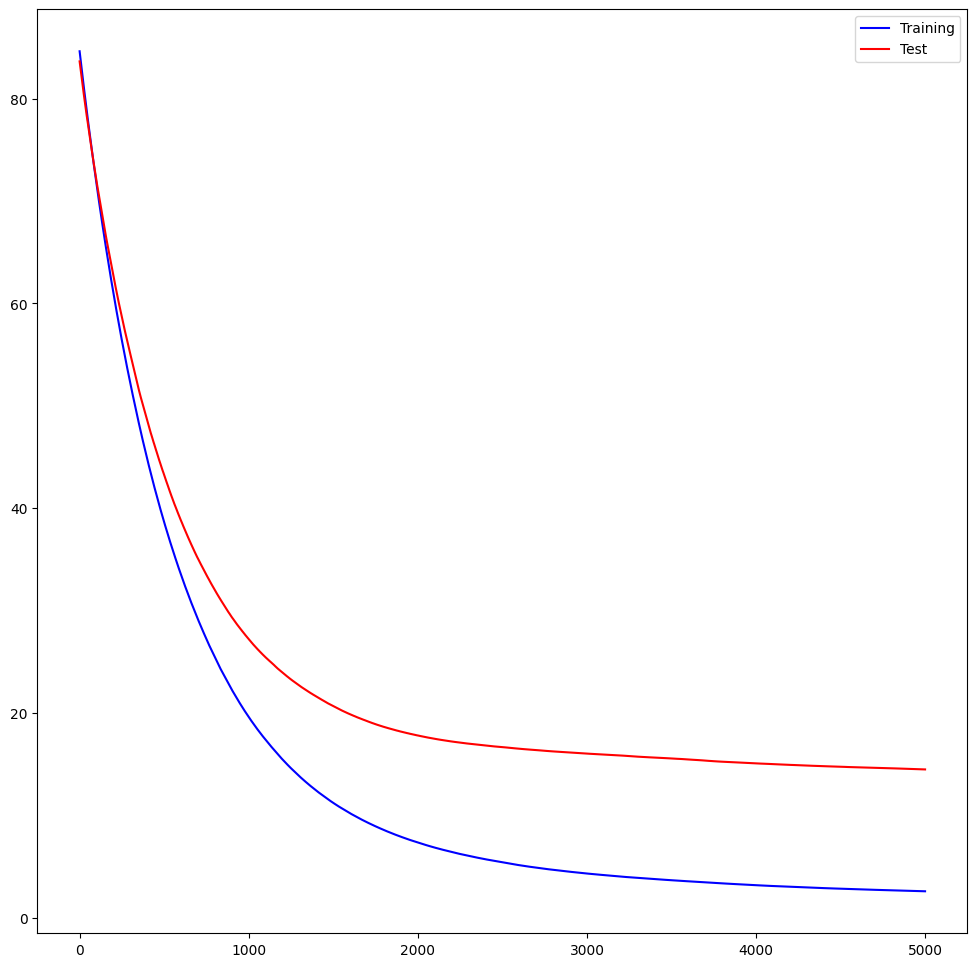

In [43]:
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)



plot_idx=  np.arange(boost_boston.train_score_.shape[0]) #creats an index as per the length of the train_score_
ax=  subplots(figsize=(12,12))[1]
ax.plot(plot_idx,
        boost_boston.train_score_,
        'b',
        label='Training')


ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')

ax.legend()

In [44]:
# We now use the boosted model to predict medv on the test set:

y_hat_boost = boost_boston.predict(X_test)
np.mean((y_test - y_hat_boost)**2)

14.481405918831591

In [45]:
y_hat_boost = boost_boston.predict(X_test)
np.mean((y_test  -  y_hat_boost)**2)

14.481405918831591

## Bayesian Additive Regression Trees

In [47]:
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train, y_train)

BART(burnin=5, ndraw=15, random_state=0)

In [51]:
yhat_test = bart_boston.predict(X_test.astype(np.float32))
np.mean((y_test - yhat_test)**2)

20.73918541749876

In [52]:
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0), index=D.columns)
var_inclusion

#This checks how many times a variable appeared in the collection

crim       25.466667
zn         30.600000
indus      24.933333
chas       21.133333
nox        27.333333
rm         28.800000
age        23.466667
dis        26.000000
rad        25.000000
tax        21.733333
ptratio    26.800000
lstat      31.866667
dtype: float64

## Excercises

In [55]:
boston_data = load_data('Boston')
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [66]:
X = boston_data.drop('medv',axis=1).__array__()
y = boston_data['medv']

In [74]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=0.4, random_state=22)


In [80]:
index = list(rs.split(X,y))

In [102]:
X_train, X_test = X[index[0][0]], X[index[0][1]]
y_train, y_test = y[index[0][0]], y[index[0][1]]


In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((303, 12), (203, 12), (303,), (203,))

In [105]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_features=6, n_estimators=600, random_state=22,max_depth=5)

In [107]:
clf.fit(X=X_train, y=y_train)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=600,
                      random_state=22)

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

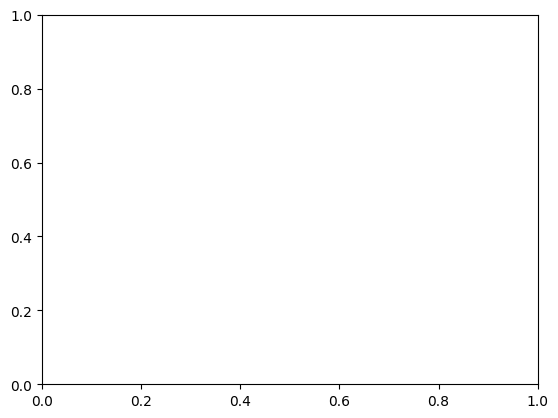

In [129]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
mean_squared_error(clf.predict(X_test),y_test.__array__())

def fitplotter(start=600,end=700,max_features=6,max_depth=5,interval=10):
    cont=[]
    for i in range(start,end,10):
        clf = RandomForestRegressor(max_depth=max_depth,
                                    max_features=max_features,
                                    n_estimators=i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cont.append(mean_squared_error(y_test, y_pred))
    plt.plot(range(start,end,interval),cont)
    plt.xlabel('n_estimators')
    plt.ylim((10,15))
    plt.ylabel('MSE')
    plt.show()

fitplotter(start=1,end=1000,max_depth=12,interval=100)